# Supplementary material for the paper "The Least Balanced Graphs and Trees"

by Péter Csikvári and Viktor Harangi

The SageMath code (with the class `Kernel`) can be found in the repository: 'perron_kernel.sage'.

In this notebook we aim to show how to use the code to perform the necessary computer checks for our proofs in the paper. The notebook also contains supplementary material to help the reader better understand the nature of these conjectures and our methods.

In [1]:
load('perron_kernel.sage')

limiting ratios:
5.09807621135332 (connected graphs)
7.46410161513775 (trees)


## Searching for trees with $\Gamma_T<\Gamma_{\mathrm{target}}$

The code runs through possible 10-kernels and tries to find trees and families of trees with $\Gamma_T$ below `Ga_target`. If `simple-check` fails, then the kernel is augmented (repeatedly if necessary) until the number of vertices in the kernel exceeds `nr_limit`.

194 rooted trees found on 10 vertices

Searching for trees with n>10 and Γ<7.70000:


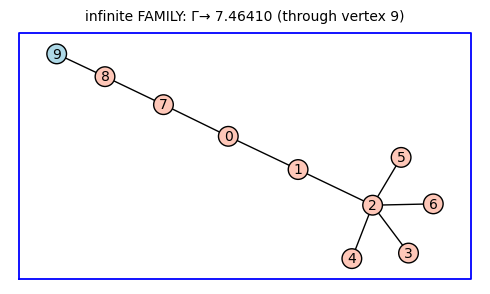

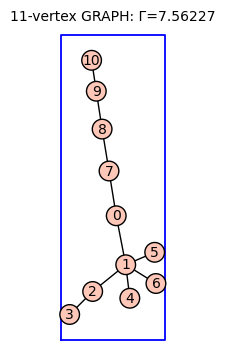

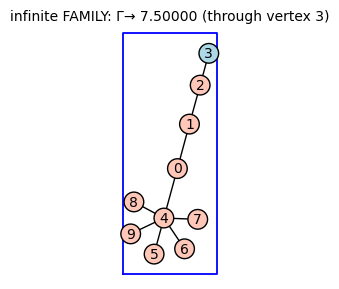

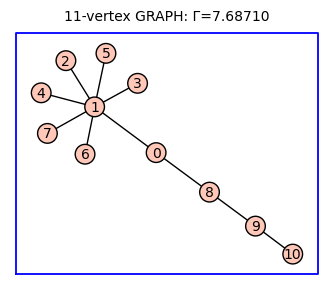

done


In [2]:
#TREES

kernels=generate_kernels(10,only_trees=True)
print()

#Ga_target=Ga_tree
#Ga_target=7.48
#Ga_target=7.6
Ga_target=7.7
#Ga_target=7.8
#Ga_target=8.0
n_limit=18

print('Searching for trees with n>10 and \u0393<{:.5f}:'.format(Ga_target))
for H,root in kernels:
    K=Kernel(H,root,Ga_target,tree_mode=True)
    K.default_active()
    K.act_Uc()
    K.search(n_limit)

print("done")


## Searching for connected graphs with $\Gamma_G<\Gamma_{\mathrm{target}}$

The code runs through possible 6-kernels and tries to find graphs and families of graphs with $\Gamma_G$ below `Ga_target`. If `simple-check` fails, then the kernel is augmented (repeatedly if necessary) until the number of vertices in the kernel exceeds `nr_limit`.

155 rooted graphs found on 6 vertices

Searching for graphs with n>6 and Γ<5.35000:


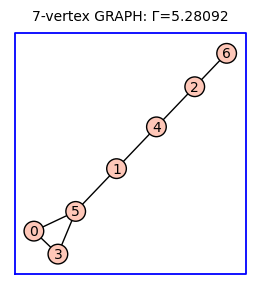

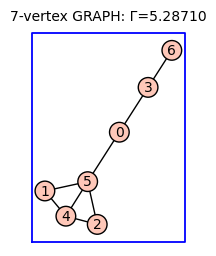

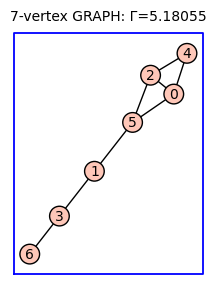

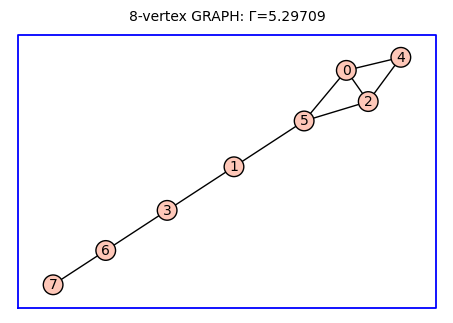

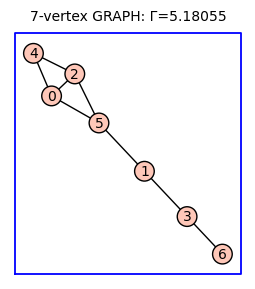

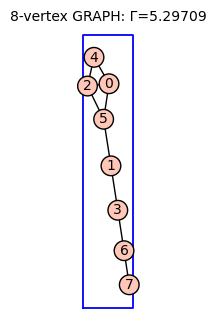

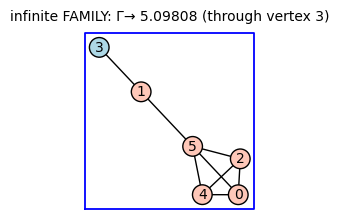

done


In [3]:
#CONNECTED GRAPHS

kernels=generate_kernels(6)
print()

#Ga_target=Ga_conn
#Ga_target=5.18
#Ga_target=5.25
Ga_target=5.35
#Ga_target=5.5
#Ga_target=5.6
n_limit=12

print('Searching for graphs with n>6 and \u0393<{:.5f}:'.format(Ga_target))
for H,root in kernels:
    K=Kernel(H,root,Ga_target)
    K.default_active()
    K.act_Uc()
    K.search(n_limit)
    
print("done")

## Computer checks for trees

The next code performs the <b>checks required for Theorem 6.6</b> of the paper: when searching for trees $T$ with $\Gamma_{T}<\beta_{\mathrm{tr}}$, it essentially rules out all but one 10-kernel (with the exception of $S_6+P_{n-6}$, $n=11,12,13$). The code outputs the details of the check (e.g., which kernels fail the `simple-check` or the details of the `active-vertex-elimination`). The default value of `Ga_target` is `Ga_tree`$=\beta_{\mathrm{tr}}\approx 7.4641$ but one may set it to a slightly higher value to find more families and single trees below `Ga_target`. 

In more detail: It runs through all possible 10-kernels (`H`,`root`) of trees and tries to verify the condition that ensures that $\Gamma_T \geq \Gamma_{\mathrm{target}}$ for all extensions $T$ of the kernel. If it fails, it checks whether an infinite pendant path may be attached to `H` such that $\Gamma_{H+P_\infty}<\Gamma_{\mathrm{target}}$. If yes, then there is an infinite family of trees $T$ with $\Gamma_{T}<\Gamma_{\mathrm{target}}$. If no, then it tries to go through the set of active vertices to see if it can rule out some of them. (During this process, it may find single trees $T$ with $\Gamma_{T}<\Gamma_{\mathrm{target}}$.) If no active vertex remains, the process terminates for the current kernel. If only one active vertex remains, then the kernel is augmented by adding a leaf at the remaining active vertex, and the process restarts with this larger kernel. (Again, a single tree with $\Gamma_{T}<\Gamma_{\mathrm{target}}$ may be found at this point.)

194 rooted trees found on 10 vertices
simple-check failed for #25:


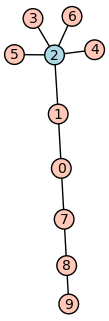

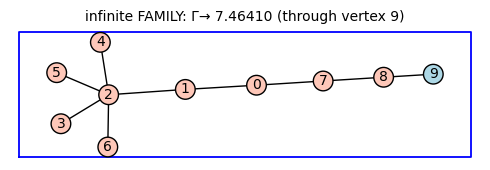

-------------------------------------------------------------------
simple-check failed for #92:


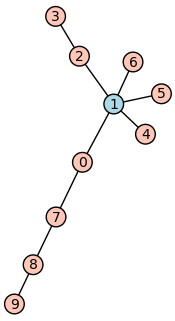

augment-check with active set [8, 9] started...
simple-check with active set [8, 9] FAILED for:


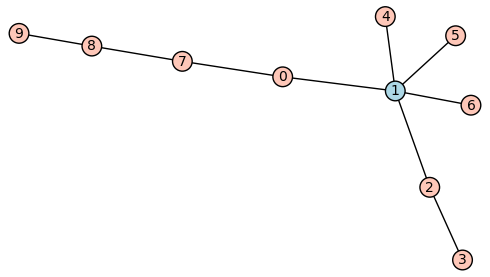

active-vertex-elimination started...
...no active vertex remained!
augment-check SUCCESSFUL
-------------------------------------------------------------------
simple-check failed for #131:


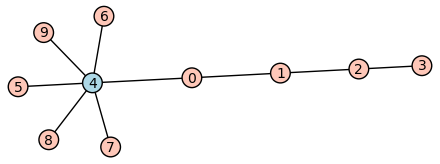

augment-check with active set [2, 3] started...
simple-check with active set [2, 3] FAILED for:


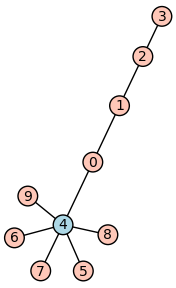

active-vertex-elimination started...


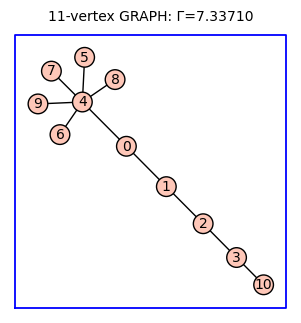

...only one active vertex remained --> adding leaf at vertex #3...
simple-check with active set [3, 10] FAILED for:


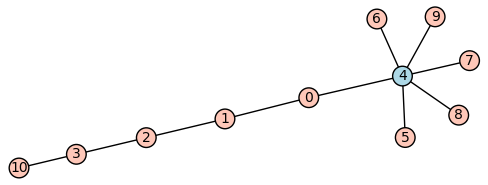

active-vertex-elimination started...


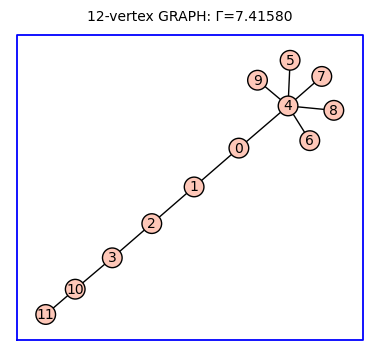

...only one active vertex remained --> adding leaf at vertex #10...
simple-check with active set [10, 11] FAILED for:


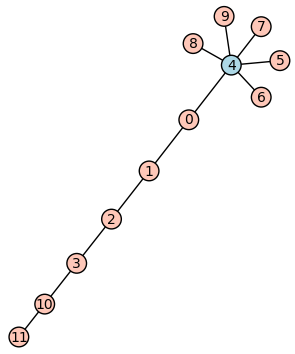

active-vertex-elimination started...


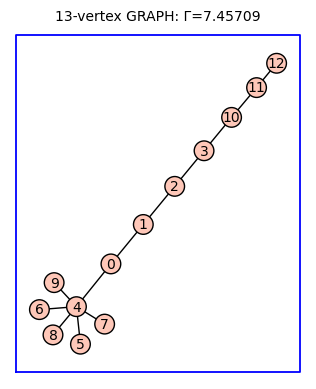

...no active vertex remained!
augment-check SUCCESSFUL
-------------------------------------------------------------------
done


In [4]:
#TREES

kernels=generate_kernels(10,only_trees=True)

Ga_target=Ga_tree

cnt=0
for H,root in kernels:
    cnt+=1
    K=Kernel(H,root,Ga_target,tree_mode=True)
    K.default_active()
    K.act_Uc()
    if K.simple_check():
        #print("simple-check SUCCESSFUL for #{}".format(cnt))
        continue
    print("simple-check failed for #{}:".format(cnt))
    K.draw()
    if K.infty_check():
        print("-------------------------------------------------------------------")    
        continue
    print("augment-check with active set {} started...".format(K.active))    
    K.augment_check()
    print("-------------------------------------------------------------------")    

    
print("done")


## Computer checks for connected graphs

The next code performs the <b>checks required for Theorem 1.6</b> of the paper: when searching for connected graphs $G$ with $\Gamma_{G}<5.25$, it essentially rules out all but one 6-kernel (with the exception of a single 7-vertex graph). The code outputs the details of the check (e.g., which kernels fail the `simple-check` and need to be augmented). The default value of `Ga_target` is $5.25$ but one may set it to a slightly higher (or lower) value. 

In more detail: It runs through all possible 6-kernels (`H`,`root`) of graphs and tries to verify the condition that ensures that $\Gamma_G \geq \Gamma_{\mathrm{target}}$ for all extensions $G$ of the kernel. If it fails, it checks whether an infinite pendant path may be attached to `H` such that $\Gamma_{H+P_\infty}<\Gamma_{\mathrm{target}}$. If yes, then there is an infinite family of graphs $G$ with $\Gamma_{G}<\Gamma_{\mathrm{target}}$. If no, then it tries the two-step verification (see the paper). At this point it may find single graphs $G$ with $\Gamma_{G}<\Gamma_{\mathrm{target}}$.

If `diag_only` is set to `True`, then it only checks the condition for pairs $U=V$ making the running time faster. In theory, it could mean that it doesn't catch a failed condition for some $U \neq V$ but it appears that if the condition holds for diagonal pairs, then it holds for all pairs.

155 rooted graphs found on 6 vertices
simple-check failed for #28:


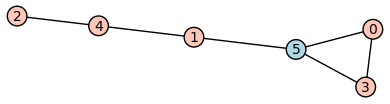

two-step-check excluding #2 vertex started...
SUCCESSFUL
-------------------------------------------------------------------
simple-check failed for #34:


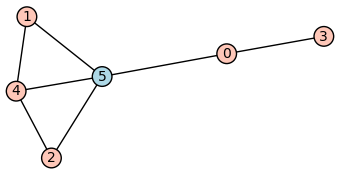

two-step-check excluding #3 vertex started...
SUCCESSFUL
-------------------------------------------------------------------
simple-check failed for #104:


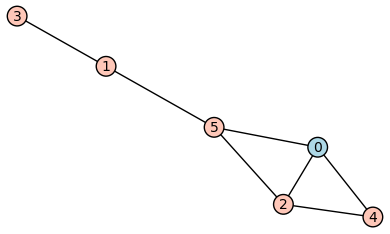

two-step-check excluding #3 vertex started...


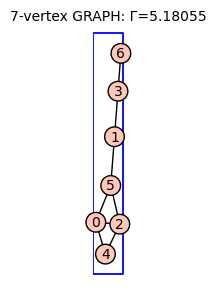

SUCCESSFUL
-------------------------------------------------------------------
simple-check failed for #105:


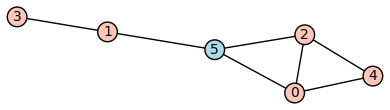

two-step-check excluding #3 vertex started...


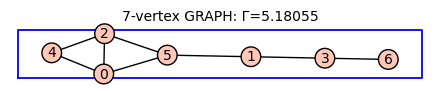

SUCCESSFUL
-------------------------------------------------------------------
simple-check failed for #109:


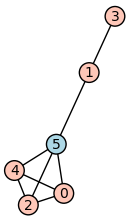

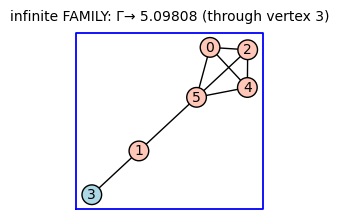

done


In [5]:
#CONNECTED GRAPHS

kernels=generate_kernels(6)

Ga_target=5.25
diag_only=False
# use 'True' to speed things up (warning: with 'True' the proof is not completely rigorous!)
#diag_only=True  

cnt=0
for H,root in kernels:
    cnt+=1
    K=Kernel(H,root,Ga_target)
    K.default_active()
    K.act_Uc()
    if K.simple_check(diag_only):
        continue
    print("simple-check failed for #{}:".format(cnt))
    K.draw()
    if K.infty_check():
        continue
        print("-------------------------------------------------------------------")    
    K.two_step_check()
    print("-------------------------------------------------------------------")    

    
print("done")

## Details of the computer check: $K_3+P_3$

Details are displayed for the computer check for a specific kernel. In this example, the kernel is the following: $H=K_3+P_3$; $o$ is the vertex of degree $3$, and the target ratio is $\Gamma_{\mathrm{target}}=\beta=5+\frac{1}{4}$. All the necessary computations are displayed. In the end, for each pair $U,V$ the polynomials $Q(\lambda)$ and $\tilde{Q}(\kappa)$ are computed and the coefficient check is performed. (In this case the check fails for the pair $U=V=\{5\}$.) <b>See the Appendix of the paper</b> for more details on what is displayed here.

One may set `H` to be any $6$-vertex connected graph with a distinguished vertex `root` and some target ratio `Ga_target`.

kernel:


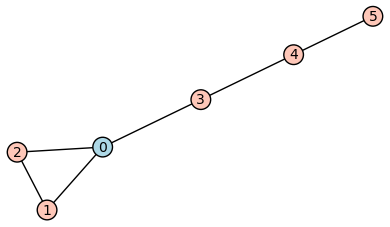

Gamma_target: 21/4
adjacency matrix:
[0 1 1 1 0 0]
[1 0 1 0 0 0]
[1 1 0 0 0 0]
[1 0 0 0 1 0]
[0 0 0 1 0 1]
[0 0 0 0 1 0]

P(λ)= λ^6 - 6*λ^4 - 2*λ^3 + 8*λ^2 + 4*λ - 1 

P(λ)B(λ):
(λ^5 - 3*λ^3 + 2*λ, λ^4 + λ^3 - 2*λ^2 - 2*λ, λ^4 + λ^3 - 2*λ^2 - 2*λ, λ^4 - 2*λ^2 + 1, λ^3 - λ, λ^2 - 1)
(λ^4 + λ^3 - 2*λ^2 - 2*λ, λ^5 - 4*λ^3 + 3*λ, λ^4 + λ^3 - 3*λ^2 - 2*λ + 1, λ^3 + λ^2 - λ - 1, λ^2 + λ, λ + 1)
(λ^4 + λ^3 - 2*λ^2 - 2*λ, λ^4 + λ^3 - 3*λ^2 - 2*λ + 1, λ^5 - 4*λ^3 + 3*λ, λ^3 + λ^2 - λ - 1, λ^2 + λ, λ + 1)
(λ^4 - 2*λ^2 + 1, λ^3 + λ^2 - λ - 1, λ^3 + λ^2 - λ - 1, λ^5 - 4*λ^3 - 2*λ^2 + 3*λ + 2, λ^4 - 3*λ^2 - 2*λ, λ^3 - 3*λ - 2)
(λ^3 - λ, λ^2 + λ, λ^2 + λ, λ^4 - 3*λ^2 - 2*λ, λ^5 - 4*λ^3 - 2*λ^2 + λ, λ^4 - 4*λ^2 - 2*λ + 1)
(λ^2 - 1, λ + 1, λ + 1, λ^3 - 3*λ - 2, λ^4 - 4*λ^2 - 2*λ + 1, λ^5 - 5*λ^3 - 2*λ^2 + 4*λ + 2)

active vertices: [4, 5]
possible subsets: [[4], [5], [4, 5]]
la_H for kernel: 2.2283

U: [4]    λ_U: 2.2533
P B~_o,U: λ^3 - λ
P s_U: λ^5 + 2*λ^4 - 3*λ^3 - 7*λ^2 - 2*λ + 1
------------------

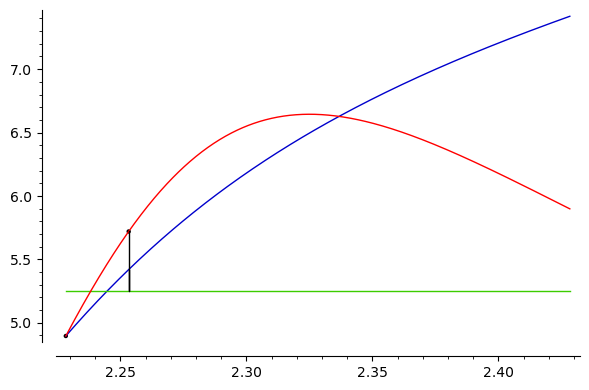

U=[4]   V=[5]   λ~: 2.2533
P^2 c_U,V: 2*λ^9 - 16*λ^7 - 8*λ^6 + 38*λ^5 + 32*λ^4 - 12*λ^3 - 6*λ^2 + 8*λ + 2 

Q(λ)= λ^12 + 2*λ^11 - 8*λ^10 - 265/8*λ^9 + 83/8*λ^8 + 1299/8*λ^7 + 693/8*λ^6 - 281*λ^5 - 517/2*λ^4 + 615/8*λ^3 + 613/8*λ^2 - 257/8*λ - 105/8 

Q~(κ)=Q(λ+λ~)= κ^12 + 29.03925928287372*κ^11 + 376.66934902823516*κ^10 + 2861.9935530867588*κ^9 + 14046.397198219627*κ^8 + 46329.41592340416*κ^7 + 103588.62346877414*κ^6 + 154664.12843342888*κ^5 + 148175.3222840991*κ^4 + 84959.69131658977*κ^3 + 26630.49335106064*κ^2 + 4425.267859089223*κ + 59.96846221995514 

simple-check SUCCESSFUL


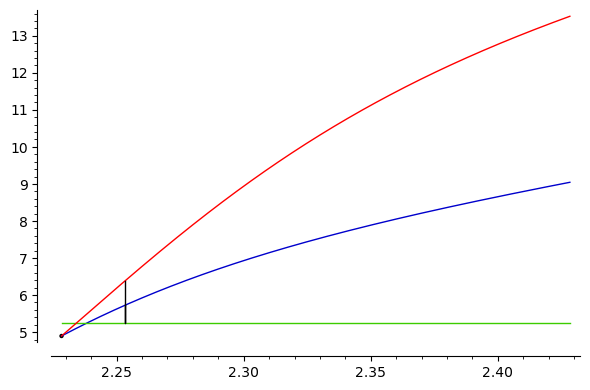

U=[4]   V=[4, 5]   λ~: 2.3429
P^2 c_U,V: λ^10 + 2*λ^9 - 6*λ^8 - 20*λ^7 - 3*λ^6 + 46*λ^5 + 55*λ^4 + 16*λ^3 - 2*λ^2 + 4*λ + 3 

Q(λ)= λ^12 + 3*λ^11 - 41/4*λ^10 - 163/4*λ^9 + 151/8*λ^8 + 783/4*λ^7 + 893/8*λ^6 - 1259/4*λ^5 - 402*λ^4 - 135/2*λ^3 + 505/8*λ^2 - 47/4*λ - 147/8 

Q~(κ)=Q(λ+λ~)= κ^12 + 31.115076993326028*κ^11 + 429.35950747111144*κ^10 + 3454.2487970061266*κ^9 + 17909.34221976818*κ^8 + 62422.03198460888*κ^7 + 148022.60012261305*κ^6 + 236521.12476929664*κ^5 + 247603.7115774412*κ^4 + 163258.30633828632*κ^3 + 66590.17452718689*κ^2 + 17078.896444477286*κ + 1176.6933613132878 

simple-check SUCCESSFUL


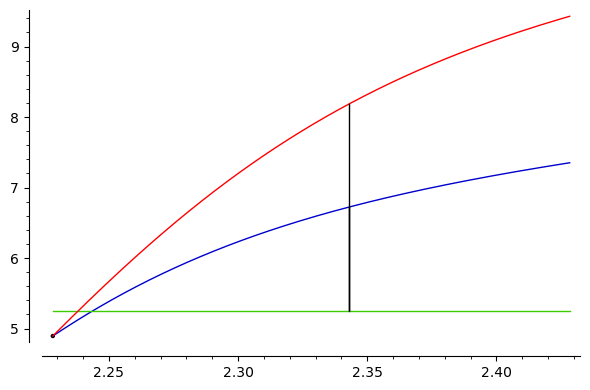

U=[5]   V=[5]   λ~: 2.2332
P^2 c_U,V: λ^10 - 9*λ^8 - 4*λ^7 + 26*λ^6 + 20*λ^5 - 23*λ^4 - 24*λ^3 + 13*λ^2 + 28*λ + 12 

Q(λ)= λ^12 + 2*λ^11 - 57/4*λ^10 - 22*λ^9 + 61*λ^8 + 97*λ^7 - 327/4*λ^6 - 357/2*λ^5 - 55/4*λ^4 + 225/2*λ^3 + 10*λ^2 - 116*λ - 269/4 

Q~(κ)=Q(λ+λ~)= κ^12 + 28.798514516691725*κ^11 + 364.03745091871434*κ^10 + 2658.616369800499*κ^9 + 12407.991417943844*κ^8 + 38599.443444564786*κ^7 + 80880.76057679139*κ^6 + 112535.6834126695*κ^5 + 99776.83685068696*κ^4 + 52219.62758726439*κ^3 + 14485.75471957297*κ^2 + 2162.8081054635218*κ - 5.536431163598557 

simple-check FAILED


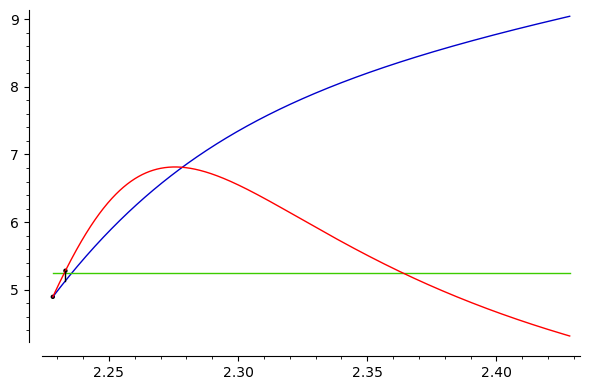

U=[5]   V=[4, 5]   λ~: 2.3429
P^2 c_U,V: λ^10 + 2*λ^9 - 9*λ^8 - 20*λ^7 + 18*λ^6 + 58*λ^5 + 9*λ^4 - 36*λ^3 + 7*λ^2 + 36*λ + 14 

Q(λ)= λ^12 + 3*λ^11 - 45/4*λ^10 - 329/8*λ^9 + 35*λ^8 + 1571/8*λ^7 + 57/2*λ^6 - 1439/4*λ^5 - 449/2*λ^4 + 1193/8*λ^3 + 38*λ^2 - 1261/8*λ - 307/4 

Q~(κ)=Q(λ+λ~)= κ^12 + 31.115076993326028*κ^11 + 428.35950747111144*κ^10 + 3430.4445661783543*κ^9 + 17670.54186863235*κ^8 + 61107.47095821744*κ^7 + 143695.2376076635*κ^6 + 227778.74974903936*κ^5 + 236631.9998576858*κ^4 + 153981.70740789047*κ^3 + 60092.35072575025*κ^2 + 13901.6890347455*κ + 948.1740981633329 

simple-check SUCCESSFUL


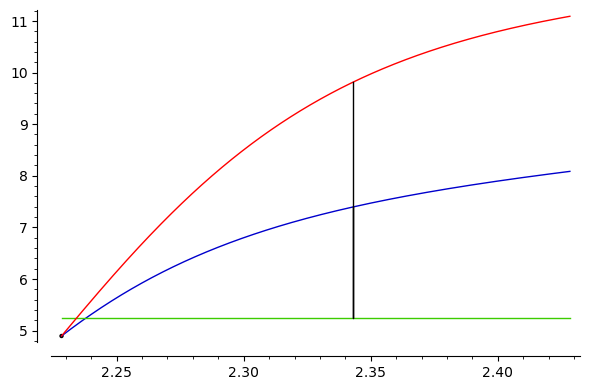

U=[4, 5]   V=[4, 5]   λ~: 2.3429
P^2 c_U,V: 2*λ^10 + 4*λ^9 - 15*λ^8 - 40*λ^7 + 15*λ^6 + 104*λ^5 + 64*λ^4 - 20*λ^3 + 5*λ^2 + 40*λ + 17 

Q(λ)= λ^12 + 4*λ^11 - 25/2*λ^10 - 225/4*λ^9 + 77/2*λ^8 + 1163/4*λ^7 + 179/2*λ^6 - 547*λ^5 - 491*λ^4 + 243/4*λ^3 + 35*λ^2 - 729/4*λ - 181/2 

Q~(κ)=Q(λ+λ~)= κ^12 + 32.11507699332603*κ^11 + 452.8816613816603*κ^10 + 3687.943899093194*κ^9 + 19168.400830806586*κ^8 + 66293.03841986635*κ^7 + 154208.48694075222*κ^6 + 238603.01201451704*κ^5 + 238983.42578506278*κ^4 + 151711.42760258802*κ^3 + 65221.813308352146*κ^2 + 21084.74030903487*κ + 1586.9888217094888 

simple-check SUCCESSFUL


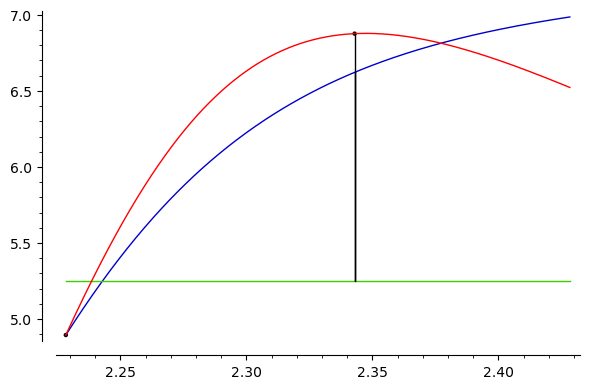

In [6]:
H=graphs.CompleteGraph(3)
add_path(H,3,0)
root=0
Ga_target=5+1/4

K=Kernel(H,root,Ga_target)
K.default_active()
K.act_Uc()
K.detailed_check()

## Details the computer check: $S_4+P_6$

Another example. This time a 10-kernel for trees is checked in detail: $H=S_4+P_6$; $o$ is the vertex of degree $4$, and the target ratio is $\Gamma_{\mathrm{target}}=\beta=\beta_{\mathrm{tr}}$.

kernel:


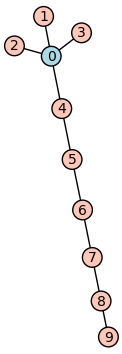

Gamma_target: 7.46410161513775
adjacency matrix:
[0 1 1 1 1 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 1 0 0 0]
[0 0 0 0 0 1 0 1 0 0]
[0 0 0 0 0 0 1 0 1 0]
[0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 0 0 1 0]

P(λ)= λ^10 - 9*λ^8 + 25*λ^6 - 22*λ^4 + 3*λ^2 

P(λ)B(λ):
(λ^9 - 5*λ^7 + 6*λ^5 - λ^3, λ^8 - 5*λ^6 + 6*λ^4 - λ^2, λ^8 - 5*λ^6 + 6*λ^4 - λ^2, λ^8 - 5*λ^6 + 6*λ^4 - λ^2, λ^8 - 4*λ^6 + 3*λ^4, λ^7 - 3*λ^5 + λ^3, λ^6 - 2*λ^4, λ^5 - λ^3, λ^4, λ^3)
(λ^8 - 5*λ^6 + 6*λ^4 - λ^2, λ^9 - 8*λ^7 + 20*λ^5 - 16*λ^3 + 2*λ, λ^7 - 5*λ^5 + 6*λ^3 - λ, λ^7 - 5*λ^5 + 6*λ^3 - λ, λ^7 - 4*λ^5 + 3*λ^3, λ^6 - 3*λ^4 + λ^2, λ^5 - 2*λ^3, λ^4 - λ^2, λ^3, λ^2)
(λ^8 - 5*λ^6 + 6*λ^4 - λ^2, λ^7 - 5*λ^5 + 6*λ^3 - λ, λ^9 - 8*λ^7 + 20*λ^5 - 16*λ^3 + 2*λ, λ^7 - 5*λ^5 + 6*λ^3 - λ, λ^7 - 4*λ^5 + 3*λ^3, λ^6 - 3*λ^4 + λ^2, λ^5 - 2*λ^3, λ^4 - λ^2, λ^3, λ^2)
(λ^8 - 5*λ^6 + 6*λ^4 - λ^2, λ^7 - 5*λ^5 + 6*λ^3 - λ, λ^7 - 5*λ^5 + 6*λ^3 - λ, λ^9 - 8*λ^7 + 20*λ^5 - 16*λ^3 + 2*

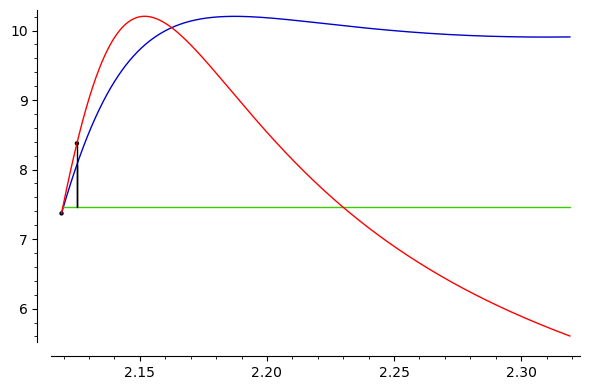

U=[8]   V=[9]   λ~: 2.1252
P^2 c_U,V: 2*λ^17 - 28*λ^15 + 148*λ^13 - 368*λ^11 + 436*λ^9 - 216*λ^7 + 60*λ^5 

Q(λ)= λ^20 + 2.00000000000000*λ^19 - 14.0000000000000*λ^18 - 42.9282032302755*λ^17 + 75.0000000000000*λ^16 + 358.994845223857*λ^15 - 197.732050807569*λ^14 - 1494.41908984796*λ^13 + 289.588457268120*λ^12 + 3272.37785163881*λ^11 - 270.301270189222*λ^10 - 3633.64957438928*λ^9 + 157.105117766515*λ^8 + 1754.35106663627*λ^7 - 29.1961524227066*λ^6 - 459.042249330972*λ^5 

Q~(κ)=Q(λ+λ~)= κ^20 + 44.50449302109845*κ^19 + 924.9087020558754*κ^18 + 11908.756796088126*κ^17 + 106287.45676079097*κ^16 + 697173.9515210544*κ^15 + 3477200.7868563915*κ^14 + 13460304.210502632*κ^13 + 40921948.47542086*κ^12 + 98249460.71401562*κ^11 + 186339978.23491243*κ^10 + 277900749.68529356*κ^9 + 322734563.5886557*κ^8 + 287287001.8005636*κ^7 + 191483195.76651704*κ^6 + 92421850.53333169*κ^5 + 30861232.638774693*κ^4 + 6759843.014298584*κ^3 + 951656.046221189*κ^2 + 89567.17173047128*κ + 462.4963886095495 

simple-chec

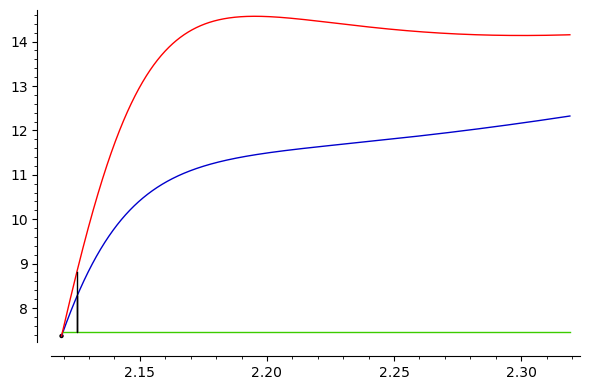

U=[9]   V=[9]   λ~: 2.1203
P^2 c_U,V: λ^18 - 15*λ^16 + 87*λ^14 - 246*λ^12 + 351*λ^10 - 234*λ^8 + 58*λ^6 + 30*λ^4 

Q(λ)= λ^20 + 2.00000000000000*λ^19 - 22.4641016151378*λ^18 - 30.0000000000000*λ^17 + 199.961524227066*λ^16 + 176.000000000000*λ^15 - 906.376840516985*λ^14 - 521.464101615138*λ^13 + 2233.16899732389*λ^12 + 859.176914536240*λ^11 - 2946.89966691335*λ^10 - 820.602540378444*λ^9 + 1900.59977794223*λ^8 + 410.210235533031*λ^7 - 480.917893677990*λ^6 - 58.3923048454133*λ^5 - 214.923048454133*λ^4 

Q~(κ)=Q(λ+λ~)= κ^20 + 44.40522447342976*κ^19 + 912.2522796393129*κ^18 + 11516.209518253574*κ^17 + 100055.33249521483*κ^16 + 634901.0250031096*κ^15 + 3046854.72038874*κ^14 + 11295405.549916942*κ^13 + 32755226.60112849*κ^12 + 74756941.185768*κ^11 + 134406602.30872712*κ^10 + 189636717.125055*κ^9 + 208148248.69154727*κ^8 + 175227552.6464969*κ^7 + 110800409.76054816*κ^6 + 51099631.05497426*κ^5 + 16515528.426997336*κ^4 + 3565804.3396193394*κ^3 + 500505.7024068114*κ^2 + 46244.19739141326*κ + 28.0

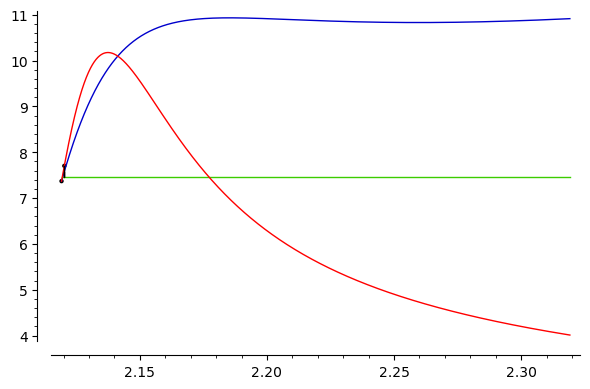

In [7]:
H=graphs.StarGraph(3)
add_path(H,6,0)
root=0

K=Kernel(H,root,tree_mode=True)
K.default_active()
K.act_Uc()
K.detailed_check()

## Ruling out early branching of the tail

The following checks need to be performed so that we can conclude that <b>(for the optimal graphs/trees) the tail cannot branch at an early stage</b>: for $k=1,2,3,4$ in case of $K_4$ and for $k=4,5,6,7,8,9$ in case of $S_5$. See Section 9 of the paper.

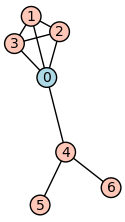

5.253366635036475 > 5.09807621135332 True
extensions > 5.09807621135332: True


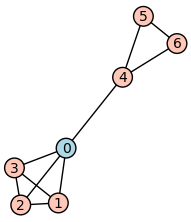

5.650358998310009 > 5.09807621135332 True
extensions > 5.09807621135332: True


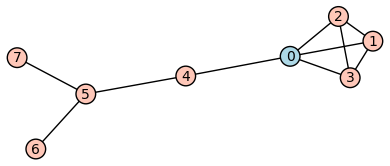

5.185723026975163 > 5.09807621135332 True
extensions > 5.09807621135332: True


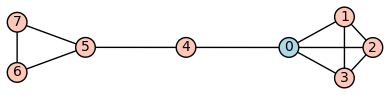

5.401048813930225 > 5.09807621135332 True
extensions > 5.09807621135332: True


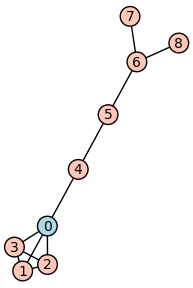

5.135875368905642 > 5.09807621135332 True
extensions > 5.09807621135332: True


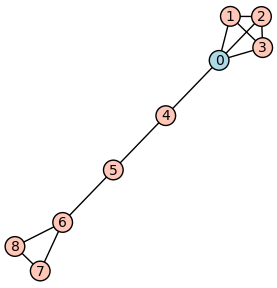

5.225993890568771 > 5.09807621135332 True
extensions > 5.09807621135332: True


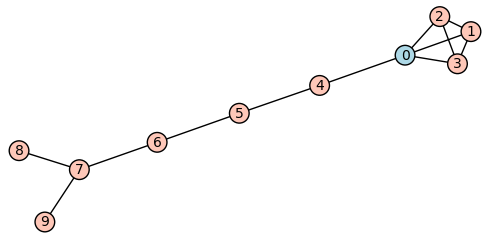

5.11287759447238 > 5.09807621135332 True
extensions > 5.09807621135332: True


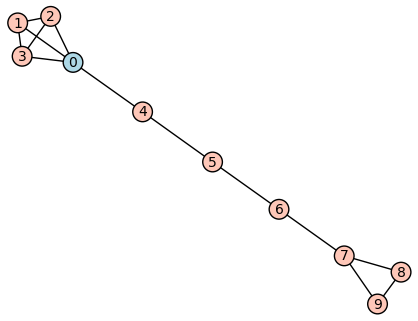

5.147565461689356 > 5.09807621135332 True
extensions > 5.09807621135332: True


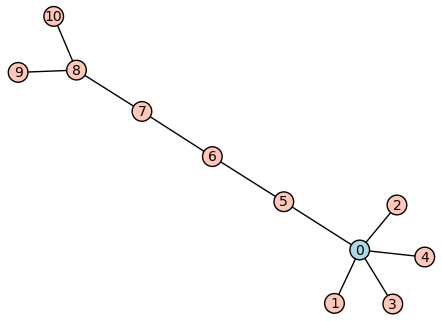

7.5205180526448485 > 7.46410161513775 True
extensions > 7.46410161513775: True


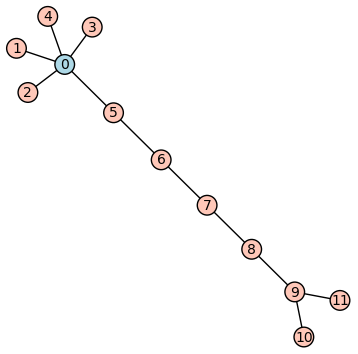

7.5303373741042 > 7.46410161513775 True
extensions > 7.46410161513775: True


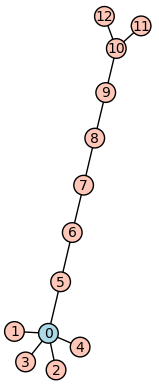

7.51605193420664 > 7.46410161513775 True
extensions > 7.46410161513775: True


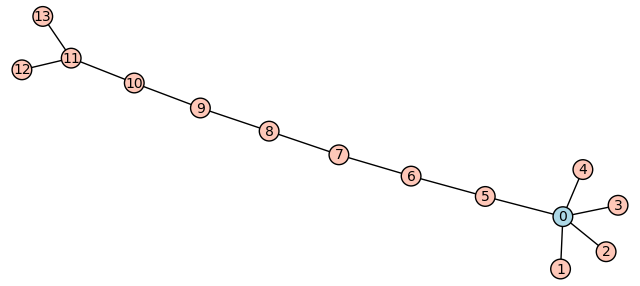

7.499426995260411 > 7.46410161513775 True
extensions > 7.46410161513775: True


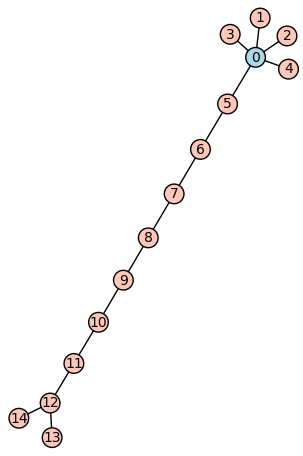

7.486518783951552 > 7.46410161513775 True
extensions > 7.46410161513775: True


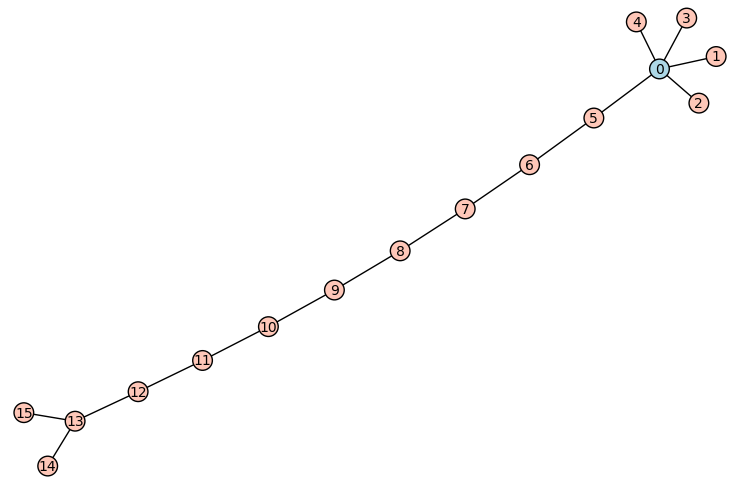

7.477798928715708 > 7.46410161513775 True
extensions > 7.46410161513775: True


In [8]:
for k in [1,2,3,4]:
    tail_check_upper_small(graphs.CompleteGraph(4),k)
    tail_check_upper_small(graphs.CompleteGraph(4),k,triangle=True)
    
for k in [4,5,6,7,8,9]:
    tail_check_upper_small(graphs.StarGraph(4),k,tree_mode=True)


## Checking the conditions of Lemma 7.5

In the relevant special cases $H=K_4$ and $H=S_5$. 

One may run this code for any $H,v,k_0$ to see if $\Gamma_{H+_v P_k} < \Gamma_{H+_v P_{\infty}}$ must hold for every $k \geq k_0$.

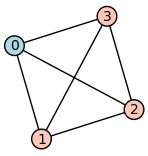

the relevant interval for λ: I=(3.0861,3.0981)
S(λ)= 1/(λ - 3)
S^(t)= t/(t^2 - 3*t + 1)

T(λ)= (λ^2 - 4*λ + 7)/(λ^4 - 4*λ^3 - 2*λ^2 + 12*λ + 9)
T^(t)= (t^6 - 4*t^5 + 9*t^4 - 4*t^3 + t^2)/(t^8 - 4*t^7 + 2*t^6 + 11*t^4 + 2*t^2 - 4*t + 1)

J^(t)= (t^7 - t^6 - 3*t^5 - 3*t^4 + 3*t^3 + 9*t^2 + 8*t + 4)/(t^7 - 5*t^6 + 7*t^5 - 7*t^4 + 23*t^3 - 19*t^2 - 6*t + 6)
J(λ)=J^(r(λ)) should be monotone increasing on I:


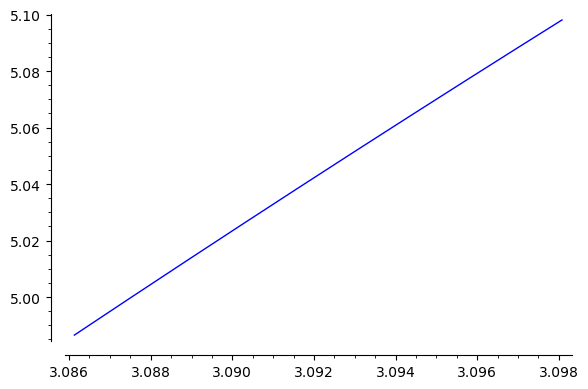

f^(t)=(T^(t)+1)t-S^(t)-t/(t-1)= (t^10 - 6*t^9 + 10*t^8 - 7*t^7 + 25*t^6 - 32*t^5 + 4*t^4 - 10*t^3 + 7*t^2 - t)/(t^9 - 5*t^8 + 6*t^7 - 2*t^6 + 11*t^5 - 11*t^4 + 2*t^3 - 6*t^2 + 5*t - 1)
f(λ)=f^(r(λ)) should be positive on I:


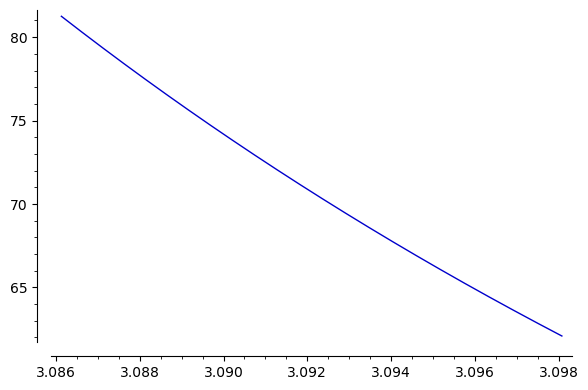

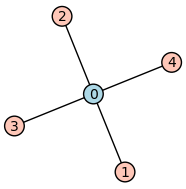

the relevant interval for λ: I=(2.2361,2.3094)
S(λ)= (λ + 4)/(λ^2 - 4)
S^(t)= (t^3 + 4*t^2 + t)/(t^4 - 2*t^2 + 1)

T(λ)= (λ^2 + 4)/(λ^4 - 8*λ^2 + 16)
T^(t)= (t^6 + 6*t^4 + t^2)/(t^8 - 4*t^6 + 6*t^4 - 4*t^2 + 1)

J^(t)= (t^4 + 4*t^3 + 10*t^2 + 12*t + 9)/(t^4 - 2*t^2 + 9)
J(λ)=J^(r(λ)) should be monotone increasing on I:


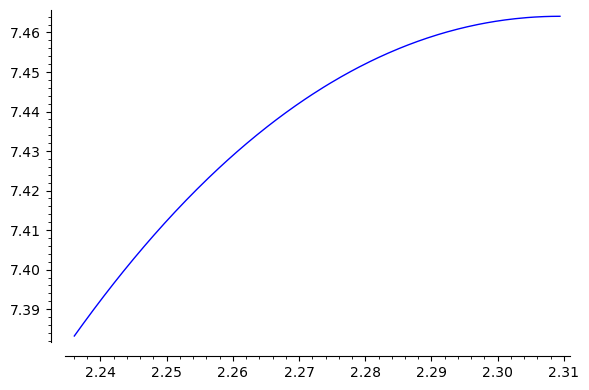

f^(t)=(T^(t)+1)t-S^(t)-t/(t-1)= (t^9 - t^8 - 5*t^7 - t^6 + 16*t^5 + 5*t^4 - 5*t^3 - 3*t^2 + t)/(t^8 - 4*t^6 + 6*t^4 - 4*t^2 + 1)
f(λ)=f^(r(λ)) should be positive on I:


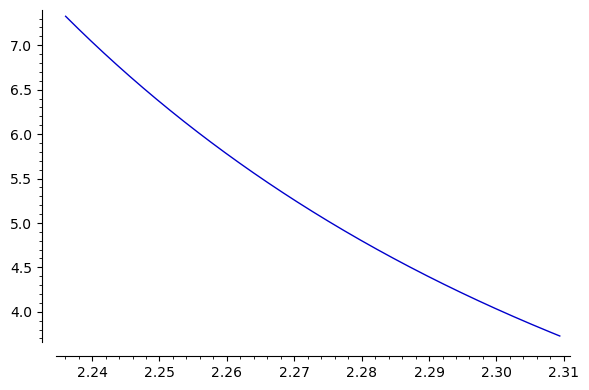

In [9]:
K=Kernel(graphs.CompleteGraph(4),0)
K.draw()
K.tail_check_lower()

K=K=Kernel(graphs.StarGraph(4),0)
K.draw()
K.tail_check_lower()

#K=K=Kernel(graphs.StarGraph(5),1)
#K.draw()
#K.tail_check_lower()


## Ranking for graphs

For each $3 \leq n \leq 6$, the $n$-vertex connected graphs $G$ are ranked in increasing order of their $\Gamma_G$ values. For each $n$, the first `display_nr` graphs are displayed. 

3-vertex connected graphs with the smallest Gamma:


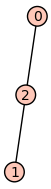

2.9142135623730954


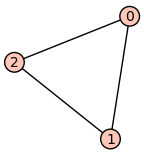

3.0000000000000004
---------------------------------------------------------
4-vertex connected graphs with the smallest Gamma:


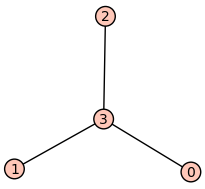

3.732050807568878


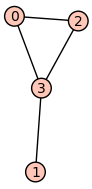

3.7593917940847903


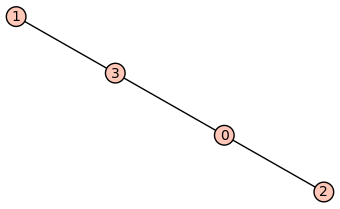

3.788854381999831
---------------------------------------------------------
5-vertex connected graphs with the smallest Gamma:


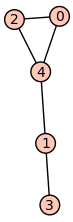

4.389714587059625


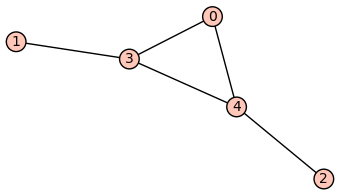

4.459684085530045


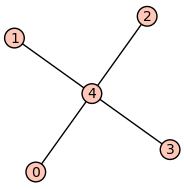

4.5
---------------------------------------------------------
6-vertex connected graphs with the smallest Gamma:


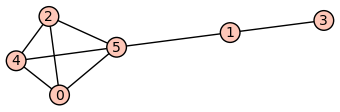

4.877797842118119


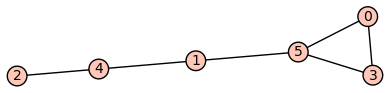

4.895005491356103


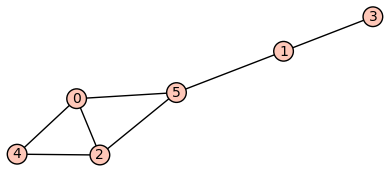

4.955687391836362
---------------------------------------------------------


In [10]:
for n in range(3,7):
    #ranking(n)
    ranking(n,display_nr=3)

## Ranking for trees

For each $3 \leq n \leq 14$, the $n$-vertex trees $T$ are ranked in increasing order of their $\Gamma_T$ values. For each $n$, the first `display_nr` trees are displayed. 

3-vertex trees with the smallest Gamma:


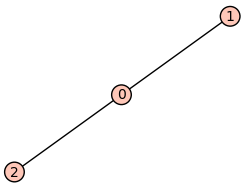

2.9142135623730954
---------------------------------------------------------
4-vertex trees with the smallest Gamma:


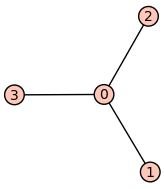

3.7320508075688767


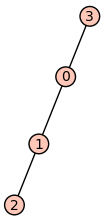

3.788854381999831
---------------------------------------------------------
5-vertex trees with the smallest Gamma:


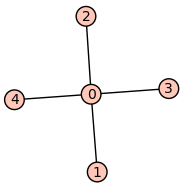

4.5


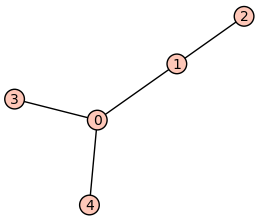

4.541102669167484


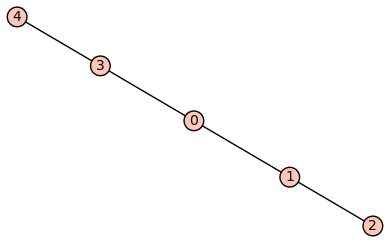

4.642734410091836
---------------------------------------------------------
6-vertex trees with the smallest Gamma:


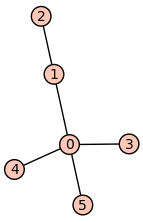

5.22350957639338


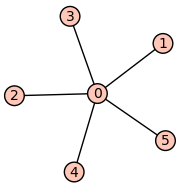

5.236067977499789


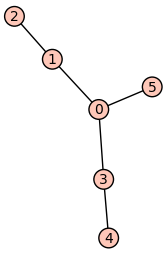

5.293658972143935
---------------------------------------------------------
7-vertex trees with the smallest Gamma:


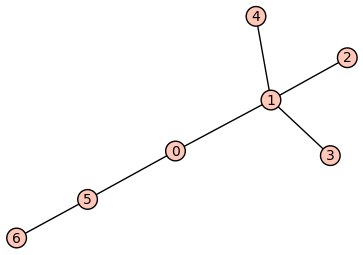

5.881694863254863


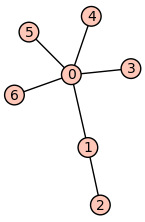

5.882568811815309


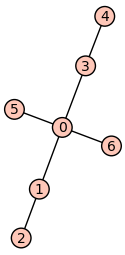

5.904210539519947
---------------------------------------------------------
8-vertex trees with the smallest Gamma:


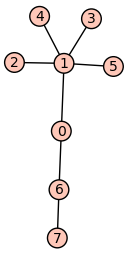

6.3963400117332565


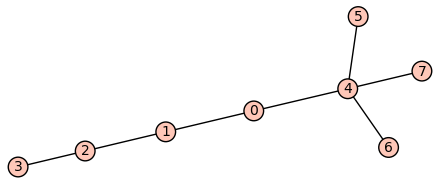

6.4618222097141755


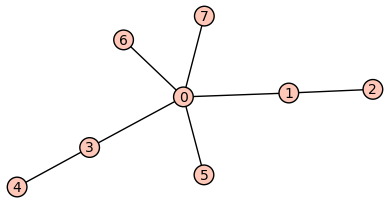

6.502117353535855
---------------------------------------------------------
9-vertex trees with the smallest Gamma:


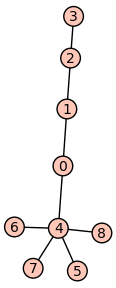

6.773303701351204


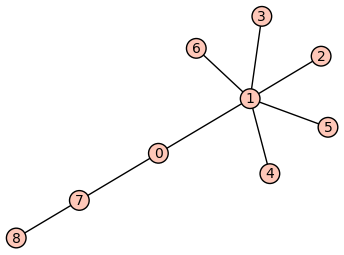

6.93935762169527


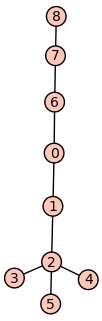

6.957939992519059
---------------------------------------------------------
10-vertex trees with the smallest Gamma:


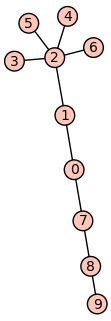

7.032163840259049


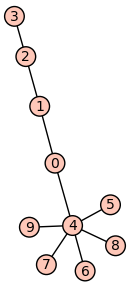

7.192164564163829


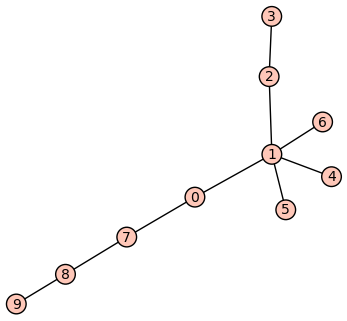

7.334567058552956
---------------------------------------------------------
11-vertex trees with the smallest Gamma:


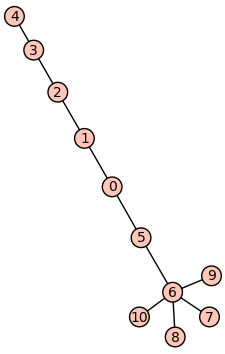

7.200853043167128


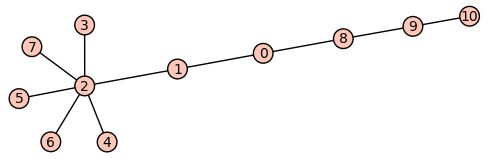

7.337103236229094


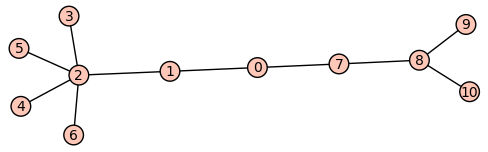

7.520518052644845
---------------------------------------------------------
12-vertex trees with the smallest Gamma:


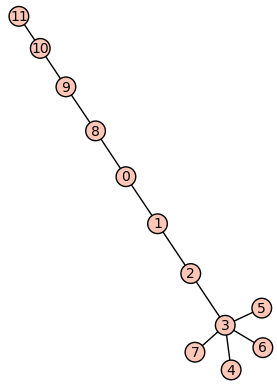

7.306568687524058


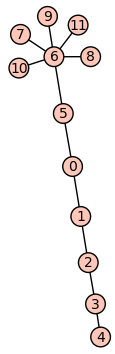

7.415799301908253


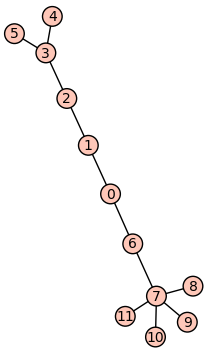

7.530337374104205
---------------------------------------------------------
13-vertex trees with the smallest Gamma:


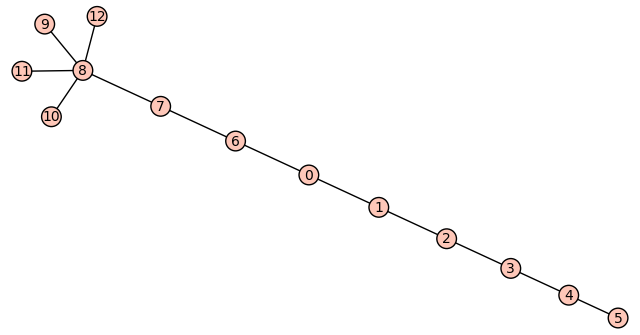

7.3710061054096325


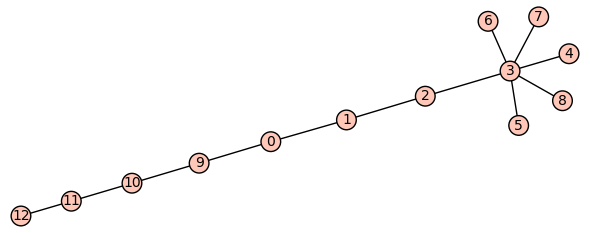

7.457090621681225


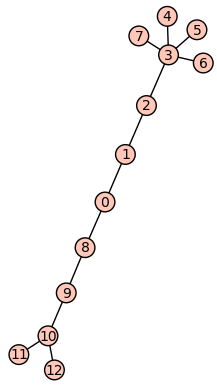

7.516051934206638
---------------------------------------------------------


In [11]:
for n in range(3,14):
    #ranking(n,only_trees=True)
    ranking(n,only_trees=True,display_nr=3)

## Graphs with top eigenvalue at most $2$

$\Gamma_G$ is computed for the four families of graphs and the six sporadic graphs for which $\lambda_G \leq 2$.

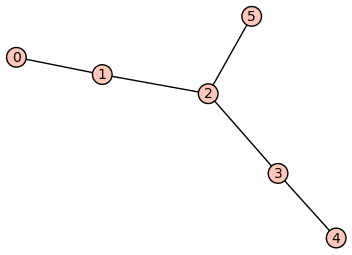

5.293658972143936


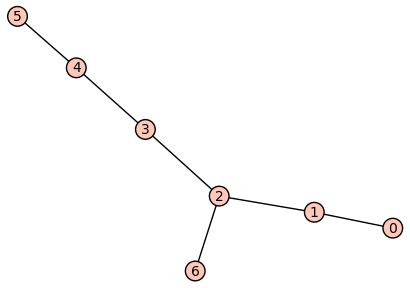

6.043666168796509


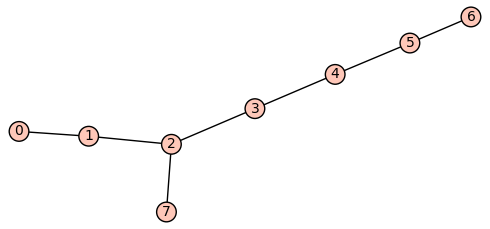

6.7810597700467925


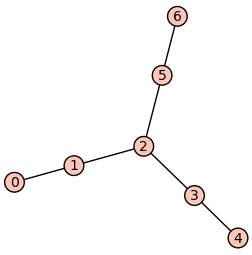

6.000000000000002


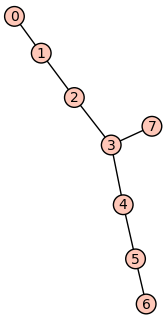

6.75


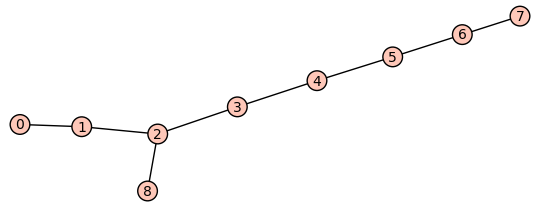

7.499999999999998


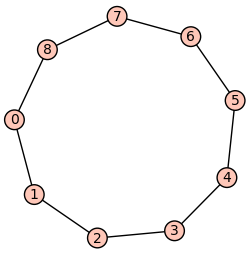

9.0


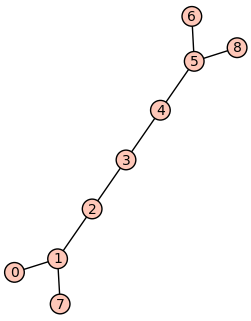

8.166666666666668


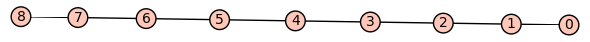

7.97269163781228


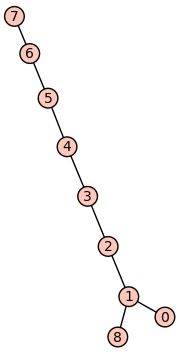

7.774575605939696
\nGamma_G for the 4 families (C_n  \hat{D}_n  P_n  D_n):
n= 5:   5.0  4.50000  4.64273  4.54110
n= 6:   6.0  5.33333  5.48448  5.34910
n= 7:   7.0  6.25000  6.31854  6.15725
n= 8:   8.0  7.20000  7.14743  6.96575
n= 9:   9.0  8.16667  7.97269  7.77458
n=10:   10.0  9.14286  8.79530  8.58368
n=11:   11.0  10.12500  9.61591  9.39300
n=12:   12.0  11.11111  10.43499  10.20251
n=13:   13.0  12.10000  11.25285  11.01216
n=14:   14.0  13.09091  12.06975  11.82192
n=15:   15.0  14.08333  12.88586  12.63179
n=16:   16.0  15.07692  13.70132  13.44174
n=17:   17.0  16.07143  14.51623  14.25175
n=18:   18.0  17.06667  15.33069  15.06182
n=19:   19.0  18.06250  16.14476  15.87194
n=20:   20.0  19.05882  16.95850  16.68211
n=21:   21.0  20.05556  17.77195  17.49231
n=22:   22.0  21.05263  18.58515  18.30254
n=23:   23.0  22.05000  19.39814  19.11280
n=24:   24.0  23.04762  20.21092  19.92309
n=25:   25.0  24.04545  21.02354  20.73340
n=26:   26.0  25.04348  21.83601  21.54373
n=27

In [12]:
# graphs G with lambda_G <= 2 and their Gamma_G

E6=graphs.PathGraph(5)
add_leaf(E6,2)

E7=graphs.PathGraph(6)
add_leaf(E7,2)

E8=graphs.PathGraph(7)
add_leaf(E8,2)

Eh8=graphs.PathGraph(8)
add_leaf(Eh8,2)

Eh6=E6.copy()
add_leaf(Eh6,5)

Eh7=graphs.PathGraph(7)
add_leaf(Eh7,3)

for G in [E6,E7,E8,Eh6,Eh7,Eh8,graphs.CycleGraph(9),bifork(9),graphs.PathGraph(9),unifork(9)]:
    draw_graph(G)
    print(GammaG(G))

print(r"\nGamma_G for the 4 families (C_n  \hat{D}_n  P_n  D_n):")
for n in range(5,50):
    Ga_cycle=GammaG(graphs.CycleGraph(n)) # =n
    Ga_bifork=GammaG(bifork(n)) # =(n-2)^2/(n-3)
    Ga_path=GammaG(graphs.PathGraph(n))
    Ga_fork=GammaG(unifork(n))
    print("n={:2d}:   {:.1f}  {:.5f}  {:.5f}  {:.5f}".format(n, Ga_cycle, Ga_bifork, Ga_path, Ga_fork))
    
    
    

## Our bound on $\Gamma_G$ in terms of $\deg_G(o)$

For each $3 \leq d < 60$, our bound $\beta_d$ is computed for graphs for which the master vertex $o$ has $d$ neighbors. For $d=3,4,5,6$, we plot the function that needs to be minimized to find $\beta_d$. 

d=3:  3.5963   (6.4641)
d=4:  4.2239   (7.0000)
d=5:  4.7882   (7.4721)
d=6:  5.3053   (7.8990)
d=7:  5.7854   (8.2915)
d=8:  6.2356   (8.6569)
d=9:  6.6609   (9.0000)
d=10:  7.0650   (9.3246)
d=11:  7.4507   (9.6332)
d=12:  7.8205   (9.9282)
d=13:  8.1761   (10.2111)
d=14:  8.5191   (10.4833)
d=15:  8.8507   (10.7460)
d=16:  9.1720   (11.0000)
d=17:  9.4838   (11.2462)
d=18:  9.7871   (11.4853)
d=19:  10.0823   (11.7178)
d=20:  10.3703   (11.9443)
d=21:  10.6514   (12.1652)
d=22:  10.9261   (12.3808)
d=23:  11.1949   (12.5917)
d=24:  11.4581   (12.7980)
d=25:  11.7161   (13.0000)
d=26:  11.9691   (13.1980)
d=27:  12.2174   (13.3923)
d=28:  12.4614   (13.5830)
d=29:  12.7011   (13.7703)
d=30:  12.9369   (13.9545)
d=31:  13.1688   (14.1355)
d=32:  13.3972   (14.3137)
d=33:  13.6221   (14.4891)
d=34:  13.8437   (14.6619)
d=35:  14.0621   (14.8322)
d=36:  14.2775   (15.0000)
d=37:  14.4900   (15.1655)
d=38:  14.6998   (15.3288)
d=39:  14.9068   (15.4900)
d=40:  15.1113   (15.6491)
d=41:  

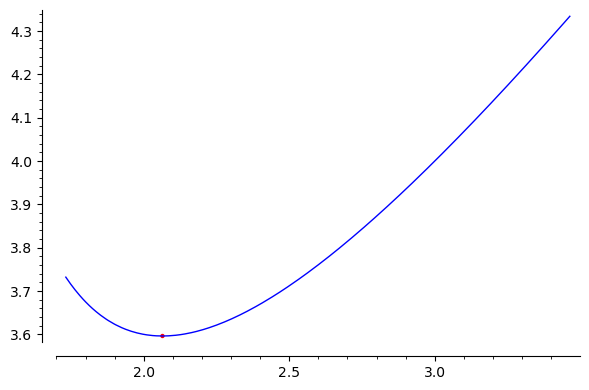

d=4:


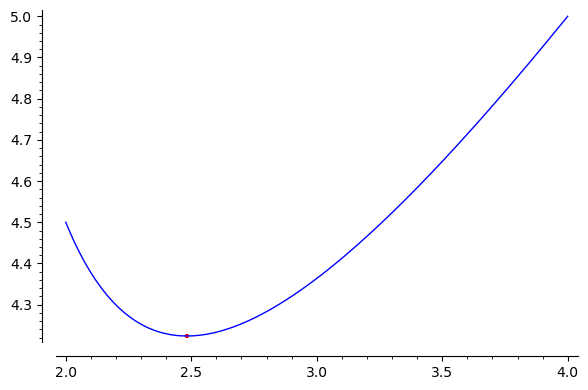

d=5:


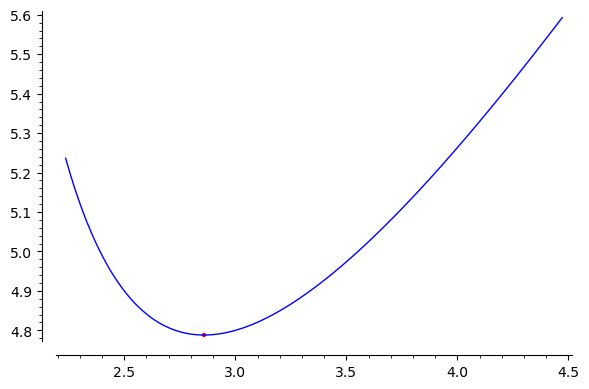

d=6:


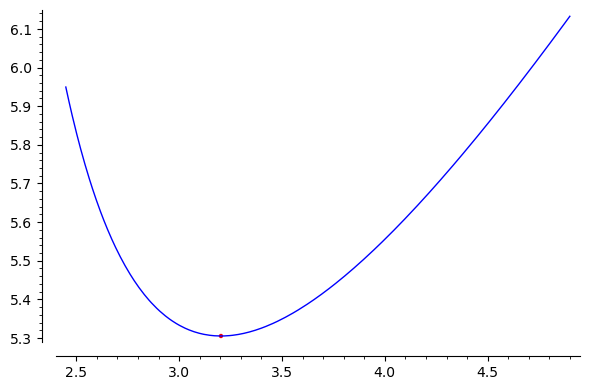

In [13]:
for d in range(3,60):
    print("d={}:  {:.4f}   ({:.4f})".format(d,beta_deg(d),2*sqrt(d+0.)+3))

print()    
for d in range(3,7):
    print("d={}:".format(d))
    beta_deg(d,True)
